In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
wmt = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/WMT.csv', index_col = 'Date', parse_dates = True)['Adj Close']
tgt = cost = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/TGT.csv', index_col = 'Date', parse_dates = True)['Adj Close']
dg = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/DG.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [56]:
cost = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/COST.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [57]:
retail = pd.concat([cost,wmt,tgt,dg], axis = 1)
retail.columns = ['COST','WMT','TGT','DG']

In [58]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [59]:
def generate_weights(n):
    weights = np.random.rand(n)
    
    return weights / np.sum(weights)

def generate_returns(weights, log_returns):
    
    return np.sum(log_returns.mean() * weights) * 252

def generate_variance(weights,log_returns_covariance):
    
    annualized_cov = np.dot(weights, log_returns_covariance * 252)
    
    volatility = np.dot(weights.transpose(), annualized_cov)
    
    return np.sqrt(volatility)


log_returns = np.log(retail / retail.shift(1))
log_returns_covariance = np.log(retail / retail.shift(1)).cov()


In [60]:
mc_portfolio_weights = []
mc_portfolio_returns = []
mc_portfolio_variance = []

for total in range(3000):
    
    total_weights = generate_weights(4)
    mc_portfolio_weights.append(total_weights)
    
    simulated_returns = generate_returns(total_weights, log_returns)
    mc_portfolio_returns.append(simulated_returns)
    
    simulated_variance = generate_variance(total_weights, log_returns_covariance)
    mc_portfolio_variance.append(simulated_variance)
    

In [61]:
mc_sharpe_ratio = np.array(mc_portfolio_returns) / np.array(mc_portfolio_variance) 

Text(0, 0.5, 'Returns')

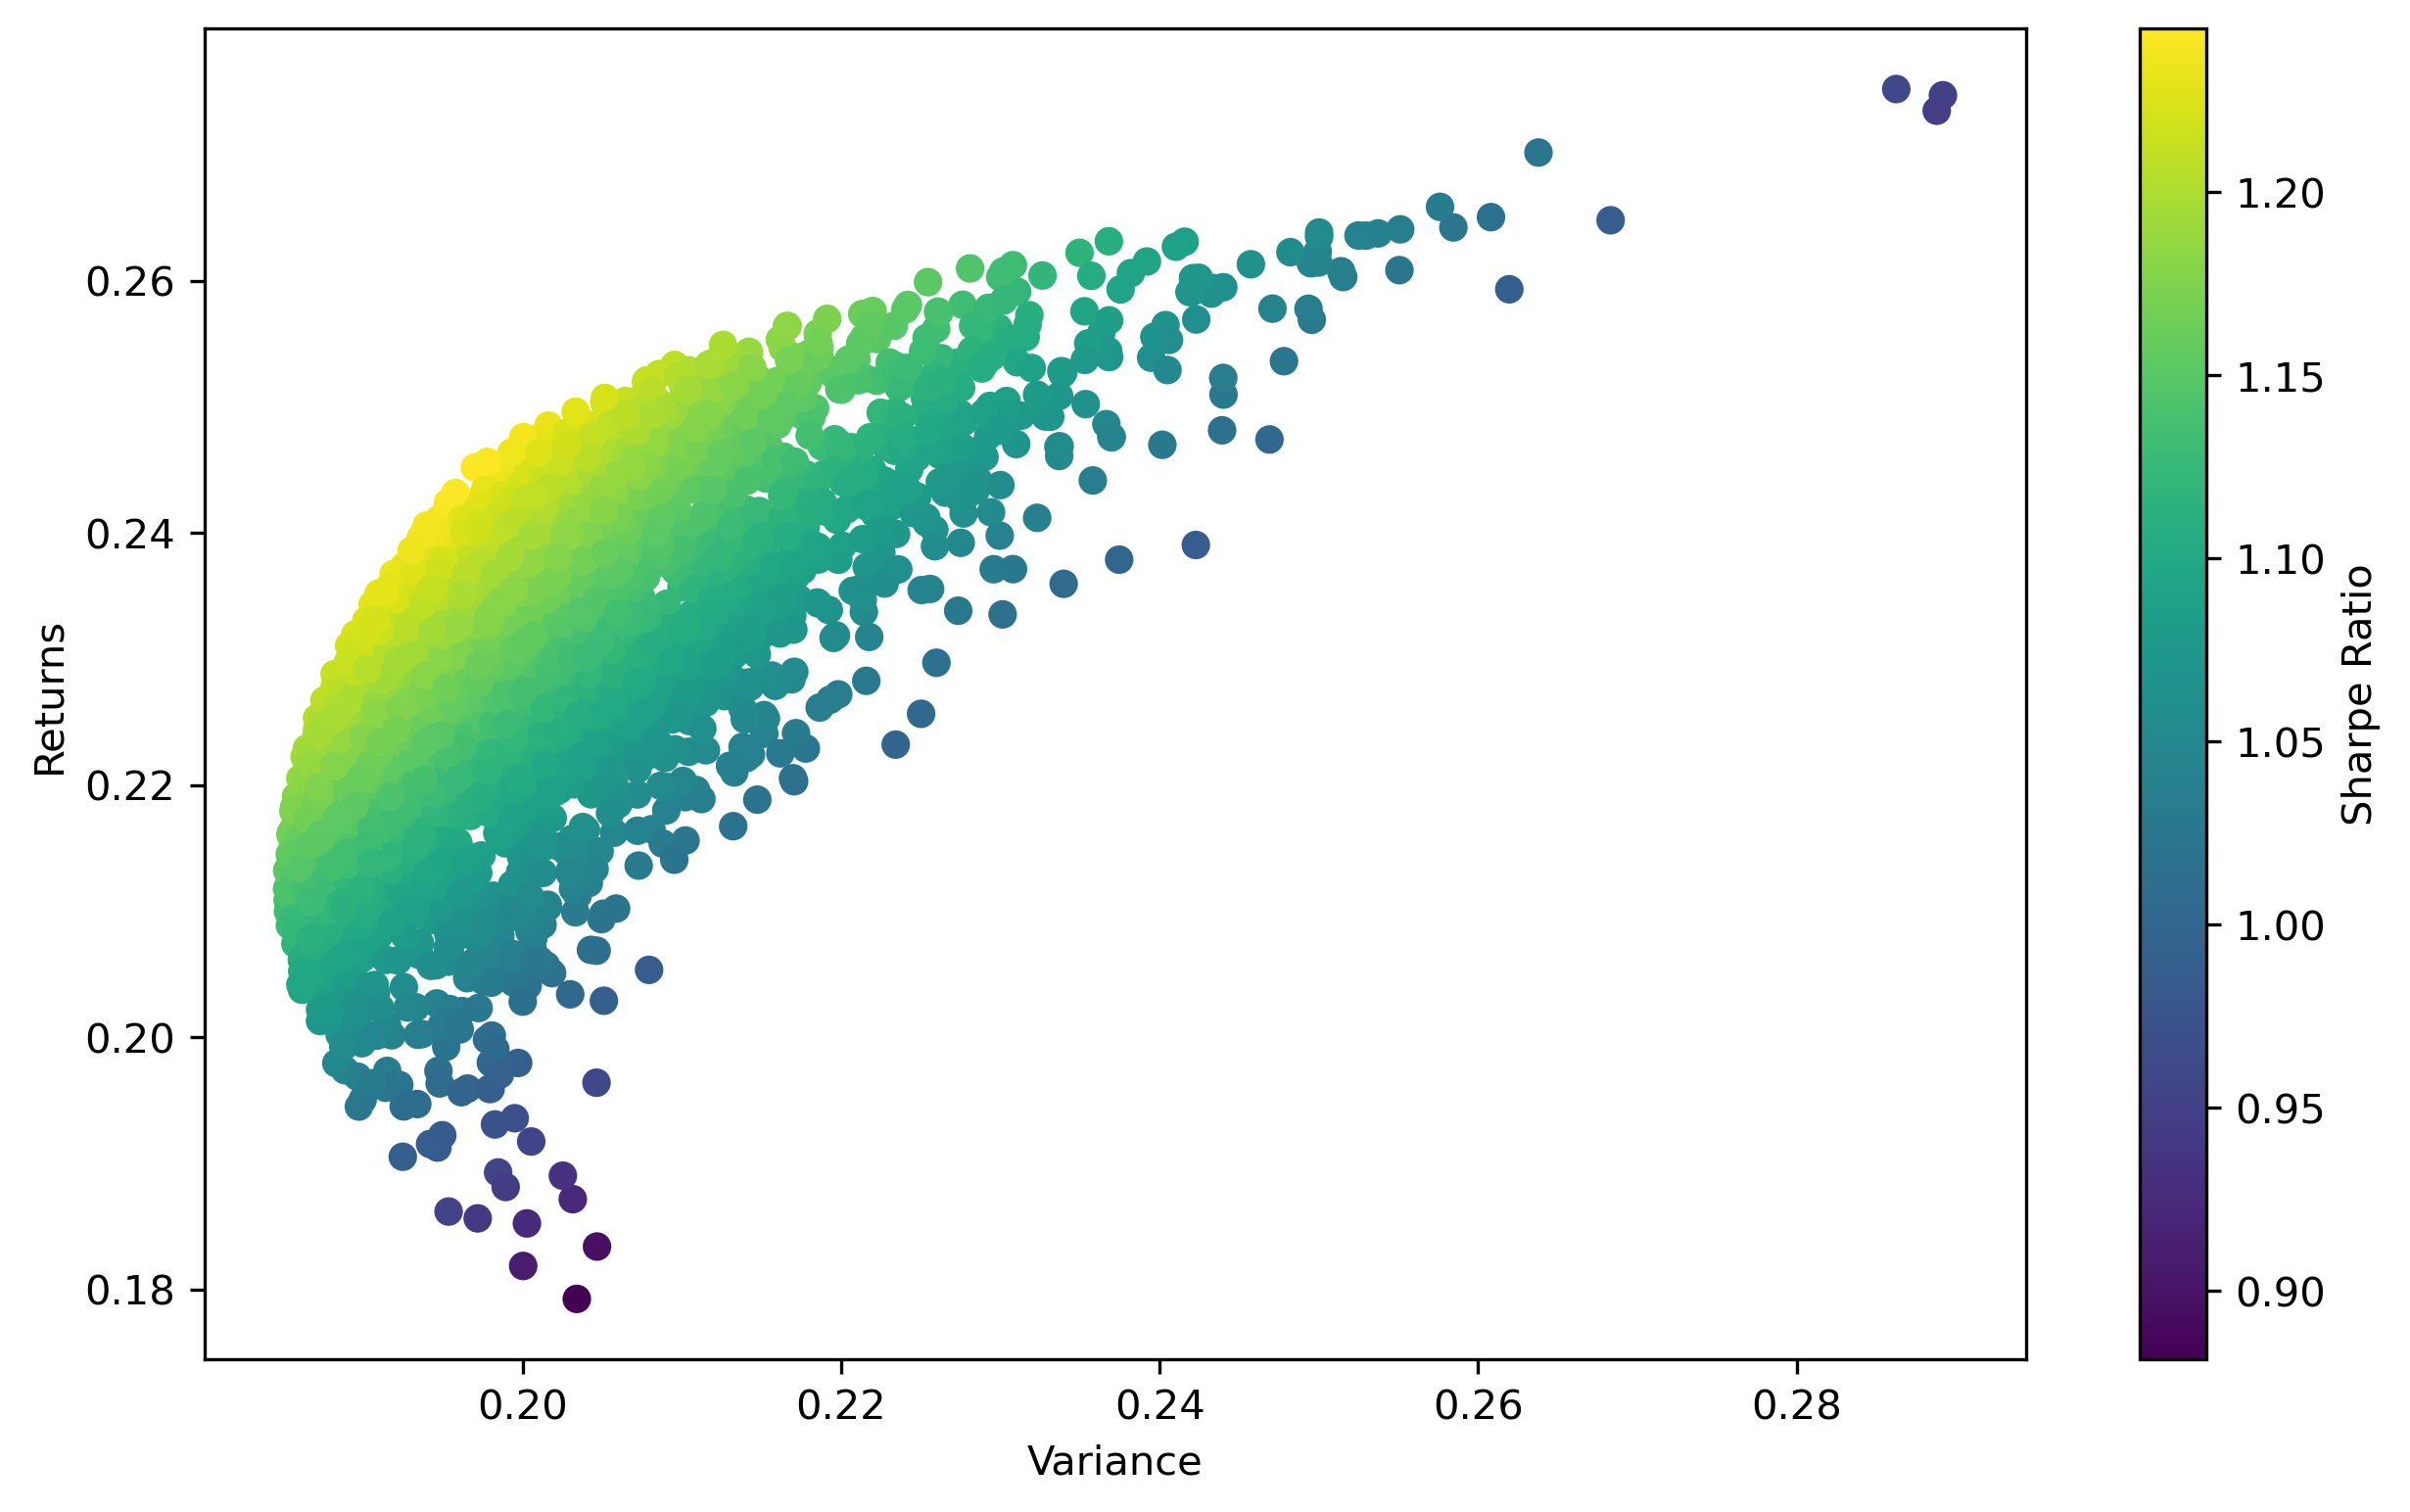

In [62]:
plt.figure(dpi = 300, figsize = (10,6))
plt.scatter(mc_portfolio_variance, mc_portfolio_returns, c = mc_sharpe_ratio)

plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Variance')
plt.ylabel('Returns')

This is the regular sharpe ratio that takes lots of trials to generate the optimal sharpe ratio
       
However, we can use mathematical techniques to minimize the search and figure out the ideal portfolio holding

In [63]:
from scipy.optimize import minimize

In [64]:
#Minimize is a funtion which takes in the bounds that we set and what values can minimize the function

#We first need to pass the function which we want to minimize

def function_to_minimize(weights):
    
    #We ideally want to maximize the Sharpe ratio. However we will multiply the Sharpe Ratios by -1 and 'minimize'
    #the sharpe ratio (because this is how the minimize functionality works and the math works out as well)
    
    return -1 * (generate_returns(weights, log_returns) / generate_variance(weights,log_returns_covariance))

In [65]:
#Now we need to define the bounds of the function 
    #First bound ==> the weights need to be between 0 and 1

bounds = tuple((0,1) for n in range(4))

    #Second bound ==> Weights need to add up to 1   

In [66]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [67]:
sum_constraint = ({'type':'eq','fun':lambda weights: np.sum(weights)-1})
    #The above constrainst means that the functional ('fun') constraint is that the sum of weights -1 should equal 0
        #reference documentation if confused because it is a bit complicated
        
#Now find out what your starting guess would be
equal_weights = [0.25,0.25,0.25,0.25]

In [68]:
minimize(fun = function_to_minimize,
        x0 = equal_weights, 
        bounds = bounds,
        constraints = sum_constraint)

     fun: -1.2451267776201174
     jac: array([-3.51712108e-04,  5.83363473e-02,  1.11971796e-03,  3.20225954e-05])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([5.84568072e-01, 2.47198095e-17, 1.76790230e-01, 2.38641698e-01])

In [70]:
np.sum([5.84568072e-01, 2.47198095e-17, 1.76790230e-01, 2.38641698e-01])

1.0

<AxesSubplot:xlabel='Date'>

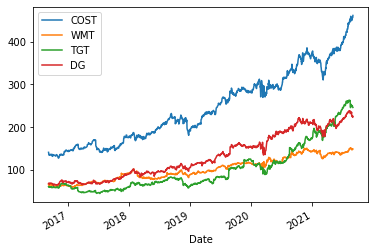

In [71]:
retail.plot()